In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Read the Auto data

a. use pandas to read the data

b. output the first few rows

c. output the dimensions of the data

In [227]:
# reading data into dataframe
df = pd.read_csv("Auto.csv")
# showing first few rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


In [228]:
# show dimensions of the data 
df.shape

(392, 9)

2. Data exploration with code

a. use `describe()` on mpg, weight, and year columns

b. write comments indicating the range and average of columns

In [229]:
# using describe() on mpg, weight, and year columns
df[['mpg','weight','year']].describe()

,mpg,weight,year
count,392.000000,392.000000,390.000000
mean,23.445918,2977.584184,76.010256
std,7.805007,849.402560,3.668093
min,9.000000,1613.000000,70.000000
25%,17.000000,2225.250000,73.000000
50%,22.750000,2803.500000,76.000000
75%,29.000000,3614.750000,79.000000
max,46.600000,5140.000000,82.000000


In [230]:
# range for 'mpg': [9, 46.6]; average = 23.445918	
# range for 'weight': [1613, 5140.000000]; average = 2977.584184
# range for 'year': [70, 82]; average = 76.010256

3. Explore data types

a. check the data types of all columns

b. change the cylinders column to categorical (use `cat.codes`)

c. change the origin column to categorical (don't use `cat.codes`)

d. verify the changes with the dtypes attribute

In [231]:
# check the dtypes of columns
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

In [232]:
# change the cylinders columns to categorical
df.cylinders = df.cylinders.astype('category').cat.codes

In [233]:
# change the origin column to categorical
df["origin"] = pd.Categorical(df.origin)

In [234]:
# verify the changes with dtypes
df.dtypes

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

4. Deal with NAs 

a. delete rows with NAs

b. output the new dimensions

In [235]:
# delete rows with NAs
df = df.dropna()

In [236]:
# output the new dimensions
df.shape

(389, 9)

5. Modify columns

a. make a new column, mpg_high, and make it categorical

b. delete the mpg and name columns (delete mpg so the algorithm doesn't just learn to predict the mpg_high from mpg)

c. output the first few rows of the modified dataframe 


In [237]:
# make a new columns, mpg_high, and make it categorical
mean_mpg = df["mpg"].mean()
df["mpg_high"] = [1 if v>mean_mpg else 0 for v in df["mpg"]]

<ipython-input-237-76b87f863abd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mpg_high"] = [1 if v>mean_mpg else 0 for v in df["mpg"]]


In [238]:
# delete the mpg and name columns 
df = df.drop(['mpg', 'name'],axis=1)

In [239]:
# output the first few rows of the new dataframe
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


6. Data exploration with graphs 

a. seaborn catplot on the mpg_high column

b. seaborn relplot with horsepower on the x axis, weight on the y axis, setting hue or style to mpg_high

c. seaborn boxplot with mpg_high on the x axis and weight on the y axis

d. for each graph, write a comment indicating one thing you learned about the data from each graph

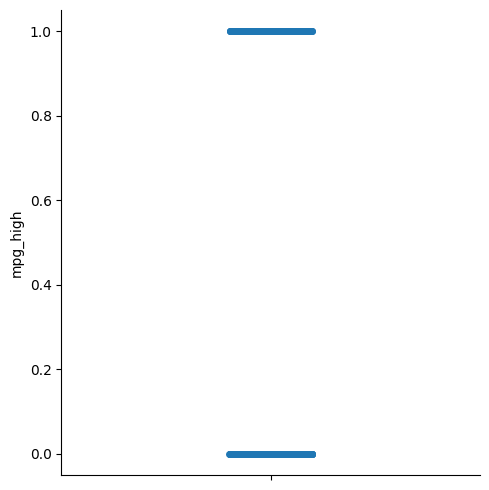

In [240]:
# seaborn catplot on the mpg_high column
g = sns.catplot(df["mpg_high"])

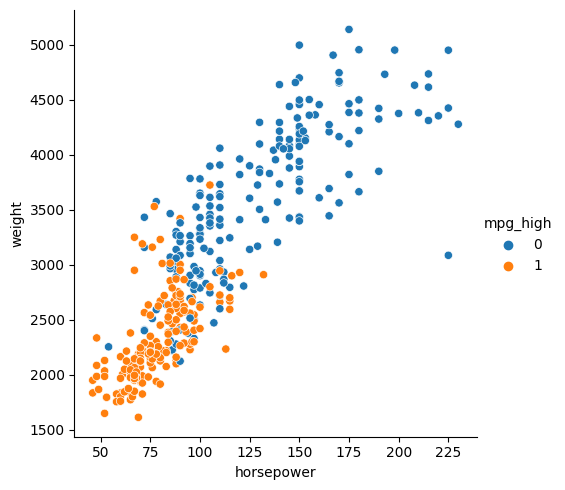

In [241]:
# seaborn relplot with horsepower on the x axis, weight on the y axis, setting hue or style to mpg_high
# the lower mpg tends towards a lower weight and horsepower
# whereas, the higher mpg tends towards higher weight and horsepower
g = sns.relplot(data=df, x="horsepower", y="weight", hue="mpg_high")

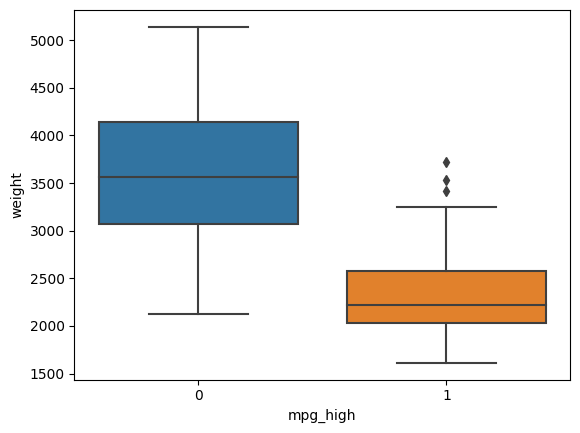

In [242]:
# there are some outliers on those examples where mpg_high is 1 
# the median of those examples where mpg_high is 0 is just over weight 3500
# the median of those examples where mpg_high is 1 is just over weight 2000
g = sns.boxplot(data=df, x="mpg_high", y="weight")

7. Train/test split

a. 80/20

b. use seed 1234 so we all get the same results

c. train/test X data frames consists of all remaining columns except mpg_high

d. output the dimensions of the train and test

In [243]:
# 80/20,
# use seed 1234 so we all get same results
from sklearn.model_selection import train_test_split

X = df.drop("mpg_high", axis=1)
y = df["mpg_high"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1234)

In [244]:
# train/test X data frames consists of all remain columns except mpg_high
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
184,1,101.0,83,2202,15.3,76.0,2
355,3,145.0,76,3160,19.6,81.0,2
57,1,97.5,80,2126,17.0,72.0,1
170,1,90.0,71,2223,16.5,75.0,2
210,4,350.0,180,4380,12.1,76.0,1


In [245]:
# train/test X data frames consists of all remain columns except mpg_high
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
43,4,400.0,175,5140,12.0,71.0,1
47,3,250.0,88,3139,14.5,71.0,1
256,3,231.0,105,3380,15.8,78.0,1
62,4,400.0,175,4385,12.0,72.0,1
268,1,134.0,95,2515,14.8,78.0,3


In [246]:
# output the dimensions of the train and test
X_train.shape

(311, 7)

In [247]:
# output the dimensions of the train and test
X_test.shape

(78, 7)

8. Logistic Regression 

a. train a logistic regression model using solver lbfgs

b. test and evalute

c. print metrics using the classification report

In [248]:
# train a logistic regression model using solver lbfgs
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model = model.fit(X_train, y_train)

In [249]:
# test and evalute
y_pred = model.predict(X_test)

In [250]:
from sklearn.metrics import classification_report

# print metrics using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



9. Decision Tree

a. train a decision tree

b. test and evaluate

c. print the classification report metrics

d. plot the tree

In [251]:
# train a decision tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [252]:
# test and evaluate
y_pred = clf.predict(X_test)

In [253]:
# print the classification report metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



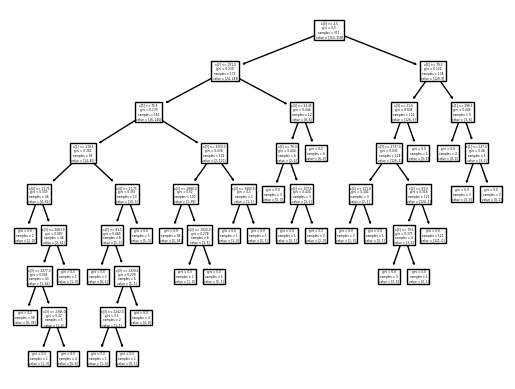

In [254]:
# plot the tree
g = tree.plot_tree(clf)

10. Neural Network 

a. train a neural network, choosing a network topology of your choice

b. test and evaluate

c. train a second neural network with a different topology and different settings

d. test and evaluate

e. compare the two models and why you think the performance was same/different


In [255]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [256]:
# a) training a neural network using topology of choice
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,2), max_iter=500, random_state=1235)
clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=500, random_state=1235,
              solver='lbfgs')

In [257]:
y_pred = clf.predict(X_test_scaled)

In [258]:
# b) test and evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.86      0.89      0.88        28

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.91      0.91      0.91        78



In [259]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# c. train a second neural network with a different topology and different settings
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

model.compile(loss="binary_crossentropy",
              optimizer = RMSprop(),
              metrics=["accuracy"],
)

history = model.fit(X_train_scaled, y_train,
                    batch_size = 128,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/30
3/3 [==============================] - 1s 91ms/step - loss: 0.6341 - accuracy: 0.6817 - val_loss: 0.4898 - val_accuracy: 0.8590
Epoch 2/30
3/3 [==============================] - 0s 21ms/step - loss: 0.4955 - accuracy: 0.8842 - val_loss: 0.4222 - val_accuracy: 0.8590
Epoch 3/30
3/3 [==============================] - 0s 23ms/step - loss: 0.4277 - accuracy: 0.8971 - val_loss: 0.3821 - val_accuracy: 0.8462
Epoch 4/30
3/3 [==============================] - 0s 24ms/step - loss: 0.3837 - accuracy: 0.8939 - val_loss: 0.3558 - val_accuracy: 0.8462
Epoch 5/30
3/3 [==============================] - 0s 35ms/step - loss: 0.3534 - accuracy: 0.8939 - val_loss: 0.3344 - val_accuracy: 0.8462
Epoch 6/30
3/3 [==============================] - 0s 23ms/step - loss: 0.3253 - accuracy: 0.8939 - val_loss: 0.3202 - val_accuracy: 0.8462
Epoch 7/30
3/3 [==============================] - 0s 25ms/step - loss: 0.3062 - accuracy: 0.8971 - val_loss: 0.3087 - val_accuracy: 0.8462
Epoch 8/30
3/3 [===========

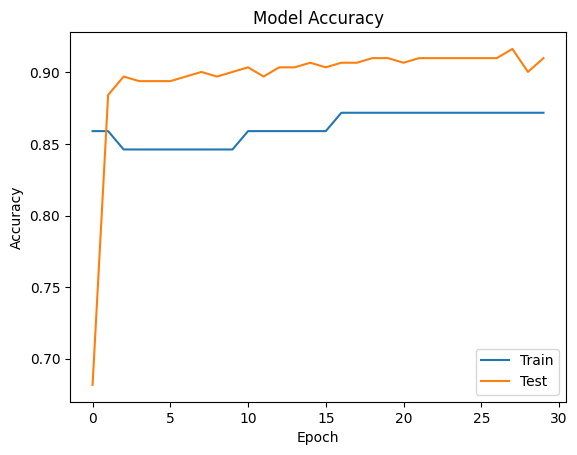

Test Loss: 22.90113%
Test Accuracy: 87.17949%


In [261]:
# d) test and evaluate

import matplotlib.pyplot as plt 

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

score = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {score[0]:.5%}")
print(f"Test Accuracy: {score[1]:.5%}")


Both of these models shared the same data transformations. Initially, the independent variables (X_train, X_test) were scaled while the dependent variables were left to their categorical representation.

The first was a multi-layer perceptron (MLP) classifier. For this model, there was only 2 hidden layers in the neural network, one with 5 nodes and one with 2 nodes. I chose to use an lbfgs solver since the dataset was relatively small, this could help with faster convergence. The accuracy of this model was quite high at about 91%. The precision and recall showed that the model was better at predicting an automobile with low mpg (mpg_high is 0), than the contrary. 

The second was a sequential model of layers. It had several layers, the first initial layer had 7 inputs and output dimensionality of 512, followed by dropout layer of 20%. The final layer was a Dense layer with an output of 2, using the 'sigmoid' activation function since this was a binary classification problem. The optimizer used was root mean squared propagation to help with faster convergence. The accuracy on this model was a bit lower than that of the MLPClassifier at about 87.18%. 